https://www.youtube.com/watch?v=C--57BP79EM

In [0]:
from os import chdir,getcwd
from google.colab import drive
#drive.mount('/gdrive')
chdir('/gdrive/My Drive/Colab Notebooks/NOTEnot/StockPrice/')
print(getcwd())

/gdrive/My Drive/Colab Notebooks/NOTEnot/StockPrice


In [0]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

In [0]:
#https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
def save_sp500_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text,'lxml')
    #select the table that have you data
    table=soup.find('table',{'class':'wikitable sortable'})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker=row.findAll('td')[0].text
        tickers.append(ticker.rstrip())#rstrip() remove the \n that comes together
    
    with open('/sp500tickers.pickle','wb') as f:
        pickle.dump(tickers,f)
    
    #print(tickers)
    return tickers
    

In [0]:
save_sp500_tickers()
#import os
#os.mkdir('/')

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CM

In [0]:
# date from yahoo
#https://www.youtube.com/watch?v=baCAFPHb1o4
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers=save_sp500_tickers()
    else:
        with open('/sp500tickers.pickle','rb') as f:
            tickers=pickle.load(f)
    
    if not os.path.exists('/stock_dfs'):
        os.makedirs('/stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2019,6,19)
    
    for ticker in tickers:#tickers[:25]: apenas as 25 primeiras
        print(ticker)
        try:
            if not os.path.exists('/stock_dfs/{}.csv'.format(ticker)):
                df=web.DataReader(ticker,'yahoo',start,end)
                df.to_csv('/stock_dfs/{}.csv'.format(ticker))
            else:
                print('Already have {}'.format(ticker))
        except Exception as error:
            print(error)
            
    

In [0]:
get_data_from_yahoo()


MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ARNC
ANET
AJG
AIZ
ATO
T
ADSK
ADP
AZO
AVB
AVY
BHGE
BLL
BAC
BK
BAX
BBT
BDX
BRK.B
'Date'
BBY
BIIB
BLK
HRB
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF.B
'Date'
CHRW
COG
CDNS
CPB
COF
CPRI
CAH
KMX
CCL
CAT
CBOE
CBRE
CBS
CE
CELG
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
FL
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GPN
GS
GWW
HAL
HBI
HOG
HRS
HIG
HAS
HCA
HCP
HP
HSIC
HSY
HE

In [0]:
#juntas todas as stocks em um arquivo apenas
def compile_data():
    with open('/sp500tickers.pickle','rb') as f:
        tickers=pickle.load(f)
    
    main_df=pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        try:
            df=pd.read_csv('/stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date',inplace=True)

            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)

            if main_df.empty:
                main_df=df
            else:
                main_df=main_df.join(df,how='outer')

            if count%50==0:
                print(count)
        except:
            pass
    print(main_df.head())
    main_df.to_csv('/sp500_joined_closes.csv')    
        

In [0]:
compile_data()

0
50
100
150
200
250
300
350
400
450
500
                  MMM       ABT  ABBV      ABMD  ...       YUM  ZBH       ZION  ZTS
Date                                             ...                               
2000-01-03  27.060949  6.671639   NaN  18.25000  ...  4.457160  NaN  42.207615  NaN
2000-01-04  25.985683  6.481020   NaN  17.81250  ...  4.367568  NaN  40.163754  NaN
2000-01-05  26.738375  6.469106   NaN  18.00000  ...  4.389968  NaN  40.116234  NaN
2000-01-06  28.888908  6.695467   NaN  18.03125  ...  4.352638  NaN  40.686600  NaN
2000-01-07  29.462400  6.766949   NaN  17.93750  ...  4.255581  NaN  40.781673  NaN

[5 rows x 503 columns]


In [0]:
def visualize_data():
    df=pd.read_csv('/sp500_joined_closes.csv') 
    #df['AAPL'].plot()
    df_corr=df.corr()
    #print(df_corr.head())
    data=df_corr.values
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    
    heatmap=ax.pcolor(data,cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels=df_corr.columns
    row_labels=df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(column_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    
    plt.tight_layout()
    

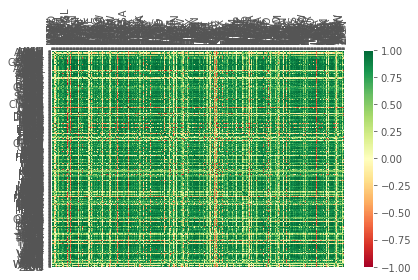

In [0]:
visualize_data()